In [38]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [39]:
image = cv2.imread(r"C:\aiprojects\computer-vision\sample2.jpeg")

# Image credit: https://www.huffpost.com/entry/ocean-plastic-pollution-illegal_n_5a8c468be4b0e1acb11d8f6b

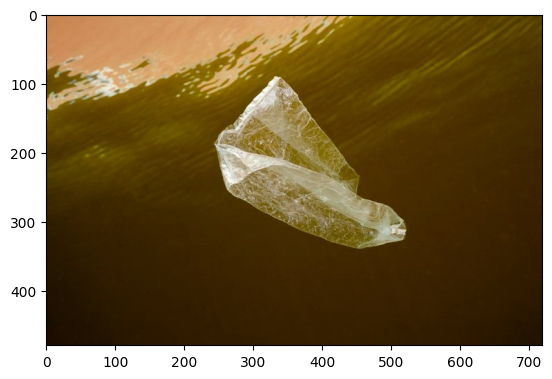

In [46]:
# cv2.imshow("Image", image)
# cv2.waitKey(0)
plt.imshow(image, cmap='gray')
plt.show()

Thresholding

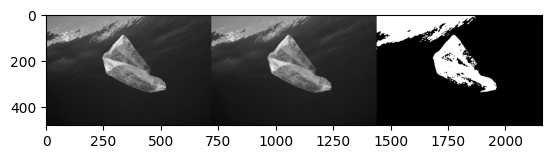

In [47]:
# To get the best results in thresholding, convert into grayscale and blur the image

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# 155 - Threshold value
# 255 - Max pixel value that the pixels with more than threshold are set to.

# T: The threshold value used in the thresholding operation. 
# This can be useful if you want to dynamically determine an optimal threshold.
# thresh: The binary thresholded image.
(T, thresh) = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)

# cv2.imshow("Thresholding of Image", np.hstack([gray, blurred, thresh]))
# cv2.waitKey(0)

# plt shows in yellow background but the results in cv2 are different
plt.imshow(np.hstack([gray, blurred, thresh]), cmap='gray')
plt.show()

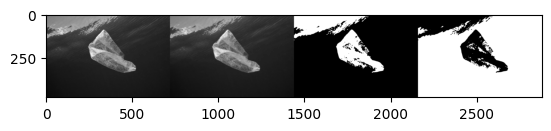

In [48]:
# Inverse Threshold
# The pixels below 200 will be set to 255
# This image has more white colors so 200 will not give complete foreground in next step
# But, if we put threshold 200 then it will give foreground

(T, threshInv) = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY_INV)

# cv2.imshow("Inverse Thresholding of Image", np.hstack([gray, blurred, thresh, threshInv]))
# cv2.waitKey(0)

# plt shows in yellow background but the results in cv2 are different
plt.imshow(np.hstack([gray, blurred, thresh, threshInv]), cmap='gray')
plt.show()

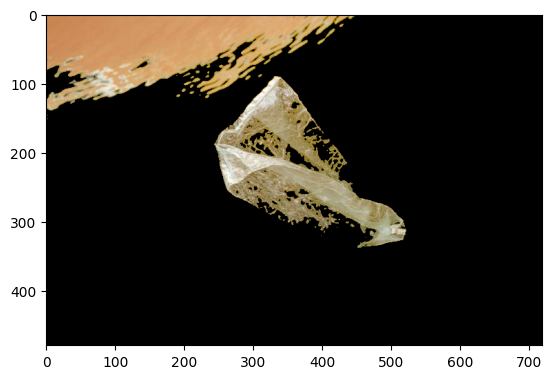

In [50]:
# Foreground extraction with normal thresholding 

# For the images where the object is colored and background is whitish,...
# ... use threshInv as mask.
foreground = cv2.bitwise_and(image, image, mask = thresh)

# cv2.imshow("Foreground Extraction", foreground)
# cv2.waitKey(0)

# plt shows in yellow background but the results in cv2 are different
plt.imshow(foreground, cmap='gray')
plt.show()

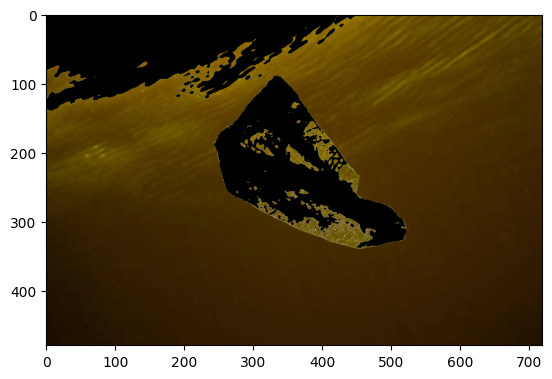

In [44]:
# Adaptive Thresholding
# Changes the value of thresholding in different segments of the image
# 255 - Max pixel value after thresholding
# 11 - Size of the neighborhood (block size) used for adaptive thresholding...
# ... It specifies the size of the pixel neighborhood used to calculate the local mean.
# 4 - Constant subtracted from the mean (weighted sum)...
# ... It is a parameter that can be adjusted to fine-tune the thresholding result.

thresh_adapt = cv2.adaptiveThreshold(blurred, 
                               255, 
                               cv2.ADAPTIVE_THRESH_MEAN_C, 
                               cv2.THRESH_BINARY_INV, 
                               11, 
                               4
)

foreground_adaptive = cv2.bitwise_and(image, image, mask = threshInv)

plt.imshow(foreground_adaptive, cmap='gray')
plt.show()

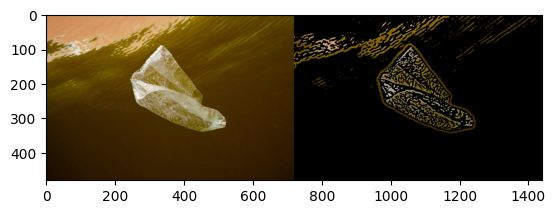

In [45]:
# Extracting Foreground with Gaussian Thresholding

gaussianthresh = cv2.adaptiveThreshold(blurred, 
                               255, 
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY_INV, 
                               15, 
                               3
)

foregroundgaussian = cv2.bitwise_and(image, image, mask = gaussianthresh)

plt.imshow(np.hstack([image, foregroundgaussian]), cmap='gray')
plt.show()